<a href="https://colab.research.google.com/github/codemaster1000/ML-Project/blob/main/Loan_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()


Saving train_csv.csv to train_csv.csv


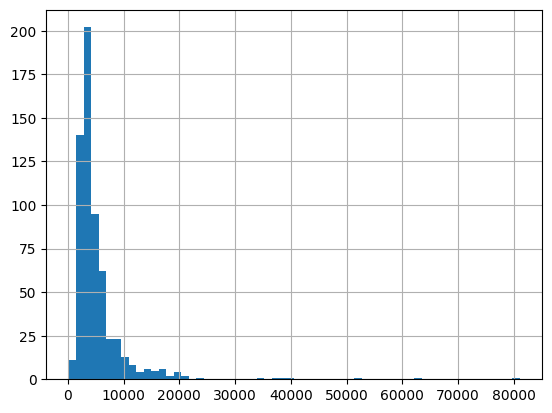

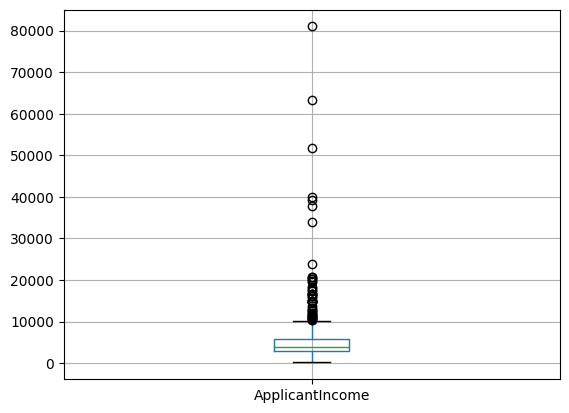

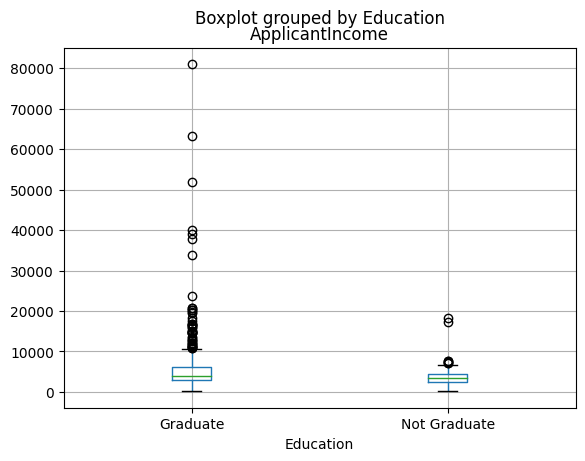

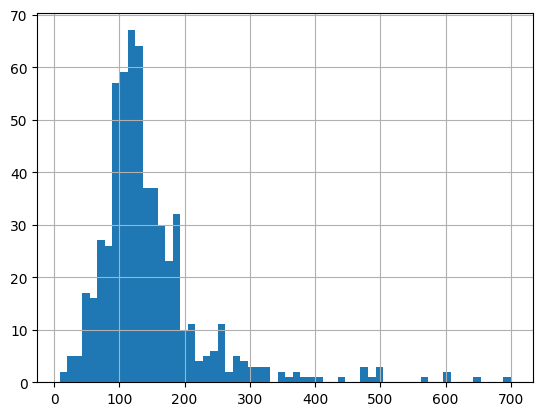

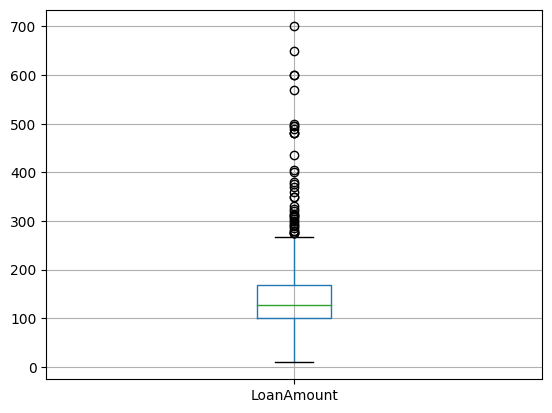

Frequency Table for Credit History
0.0     89
1.0    475
Name: Credit_History, dtype: int64
    Loan_ID  Gender  Married  Dependents  Education  Self_Employed  \
0  LP001002       1        0         0.0          1              0   
1  LP001003       1        1         1.0          1              0   
2  LP001005       1        1         0.0          1              1   
3  LP001006       1        1         0.0          0              0   
4  LP001008       1        0         0.0          1              0   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0  146.412162             360.0   
1             4583             1508.0  128.000000             360.0   
2             3000                0.0   66.000000             360.0   
3             2583             2358.0  120.000000             360.0   
4             6000                0.0  141.000000             360.0   

  Credit_History  Property_Area  Loan_Status  TotalIncome  T

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Training score: 0.8078902229845626
Testing score: 0.8387096774193549
Cross-validation scores: [0.80487805 0.76422764 0.7804878  0.84552846 0.83606557]
Mean accuracy: 0.8062375049980008


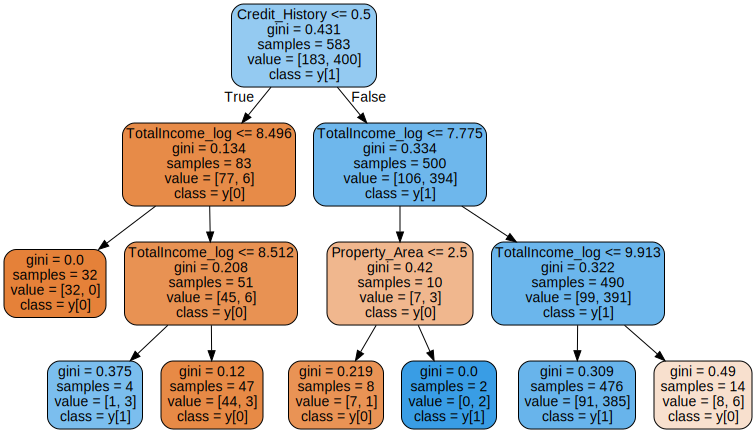

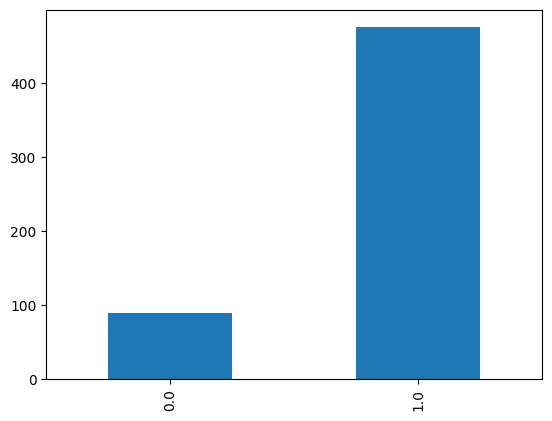

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

#insert data
import io
df = pd.read_csv(io.BytesIO(uploaded['train_csv.csv']))
#infer_objects()
df=df.infer_objects()
df.dtypes

df.head()
df.shape
df.describe()
#for stripe, obeserve the distribution
df['Property_Area'].value_counts()

df['ApplicantIncome'].hist(bins=60)
plt.show()
df.boxplot(column='ApplicantIncome')
plt.show()
#compared with Education
df.boxplot(column='ApplicantIncome',by='Education')
plt.show()

df['LoanAmount'].hist(bins=60)
plt.show()
df.boxplot(column='LoanAmount')
plt.show()

temp1 = df['Credit_History'].value_counts(ascending=True)
print ('Frequency Table for Credit History')
print(temp1)
temp1.plot(kind='bar')

df.isnull().sum()

#impute object with mode - fill NaN
df['Gender'].fillna('Male',inplace=True)
df['Married'].fillna('Yes',inplace=True)
df['Dependents'].fillna('0',inplace=True)
df['Self_Employed'].fillna('No',inplace=True)
df['Credit_History'].fillna('1.0',inplace=True)
df.isnull().sum()

#impute int(float) with mean
df.fillna(df['LoanAmount'].mean(),inplace=True)
df.fillna(df['Loan_Amount_Term'].mean(),inplace=True)
df.isnull().sum()

#create TotalIncome = ApplicantIncome + CoapplicantIncome
df['TotalIncome']=df['ApplicantIncome']+df['CoapplicantIncome']
df['TotalIncome_log']=np.log(df['TotalIncome'])

df.head()
df.dtypes

#transfer bool to float
df.dtypes
df["Married"]=np.where(df["Married"] == "Yes",1,0)
df["Gender"]=np.where(df["Gender"] == "Male",1,0)
df["Education"]=np.where(df["Education"] == "Graduate",1,0)
df["Self_Employed"]=np.where(df["Self_Employed"] == "Yes",1,0)
df["Loan_Status"]=np.where(df["Loan_Status"] == "Y",1,0)
df["Dependents"]=np.where(df["Dependents"] == "3+",3,df["Dependents"])
df["Dependents"]=df["Dependents"].astype("float")
df.head()

def fun(x):
    if x == 'Rural':
        return 1
    elif x == 'Urban':
        return 2
    else:
        return 3

df['Property_Area'] = df.Property_Area.apply(lambda x: fun(x))

#check types of data
print(df.head(5))
print('-'*50)
df.dtypes

from sklearn import metrics
X=df[['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'TotalIncome_log','LoanAmount',
       'Loan_Amount_Term','Credit_History','Property_Area']]
Y=df['Loan_Status']
from sklearn.model_selection import train_test_split
X_trainL,X_testL,Y_trainL,Y_testL = train_test_split(X,Y,test_size=0.05)
#check
X_trainL.shape,X_testL.shape,Y_trainL.shape,Y_testL.shape

#Logistic Regression
from sklearn.linear_model import LogisticRegression
logis = LogisticRegression()
#use function, fit, train the parameter
logis.fit(X_trainL, Y_trainL)
#prediction
predicted = logis.predict(X_testL)
expected = Y_testL

#score
logis_score_train = logis.score(X_trainL,Y_trainL)
print('Training score:',logis_score_train)
logis_score_test = logis.score(X_testL,Y_testL)
print('Testing score:',logis_score_test)

# Decision Tree
X_trainD,X_testD,Y_trainD,Y_testD = train_test_split(X,Y,test_size=0.05)
#check
X_trainD.shape,X_testD.shape,Y_trainD.shape,Y_testD.shape
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
decision_tree = DecisionTreeClassifier(max_depth=3)
scores = cross_val_score(decision_tree, X, Y, cv=5)
# decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_trainD, Y_trainD)
# Y_pred_7 = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_trainD, Y_trainD) * 100, 2)
acc_decision_tree
print("Cross-validation scores:", scores)
print("Mean accuracy:", scores.mean())

from sklearn import tree
import graphviz
dot_data = tree.export_graphviz(decision_tree, out_file=None,
                                feature_names = X_trainD.columns.tolist(), class_names = True,
                                filled = True, rounded = True)
graph = graphviz.Source(dot_data)
graph




In [ ]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome,TotalIncome_log
0,LP001002,1,0,0.0,1,0,5849,0.0,146.412162,360.0,1.0,2,1,5849.0,8.674026
1,LP001003,1,1,1.0,1,0,4583,1508.0,128.000000,360.0,1.0,1,0,6091.0,8.714568
2,LP001005,1,1,0.0,1,1,3000,0.0,66.000000,360.0,1.0,2,1,3000.0,8.006368
3,LP001006,1,1,0.0,0,0,2583,2358.0,120.000000,360.0,1.0,2,1,4941.0,8.505323
4,LP001008,1,0,0.0,1,0,6000,0.0,141.000000,360.0,1.0,2,1,6000.0,8.699515
